In [1]:
#Analise de Dados
#Enade 2010-2017
#Candidatos do ENADE que estudam em escola EAD e tiveram nota maior que 75

#importanto a biblioteca de plotagem para a geração do gráfico
import matplotlib.pyplot as plt

In [2]:
#criando o caminho para para os arquivos para serem analiazaos
caminho = r"C:\Users\Luis Henrique\Documents\FATEC\Algorítimos\Enade"

In [3]:
#lista de arquivos para serem analizados
arquivos = ['\MICRODADOS_ENADE_2017.txt','\MICRODADOS_ENADE_2016.txt',
            '\MICRODADOS_ENADE_2015.txt','\MICRODADOS_ENADE_2014.txt',
            '\MICRODADOS_ENADE_2013.txt','\MICRODADOS_ENADE_2012.txt',
            '\MICRODADOS_ENADE_2011.txt','\MICRODADOS_ENADE_2010.txt']


In [4]:
#Dicionário onde serão armazenadas as chaves (anos) e valores da análise
grafico = {}

modalidade = 'CO_MODALIDADE'
nota_geral = 'NT_GER'
x = 0
ano = 2017
correspondentes_total = 0

In [5]:
while x < len(arquivos):
    file = open(caminho + arquivos[x])
    rotulos = file.readline().split(';')
    analisados = 0
    correspondentes = 0
    print(f'\n>> Analisando base de dados do ano de {ano}...')
    for rotulo in rotulos:
        if rotulo == modalidade:
            for linha in file:
                campos = linha.split(';')
                analisados += 1
                if campos[rotulos.index(nota_geral)] != '' and campos[rotulos.index(nota_geral)] != nota_geral:
                    nota_bruta = float(campos[rotulos.index(nota_geral)].replace(',','.'))
                    if campos[rotulos.index(modalidade)] == '0' and nota_bruta >= 75:
                        correspondentes += 1
                        correspondentes_total += 1                    
    print(f'-> Candidatos analisados: {analisados}')
    print(f'-> Correspondem aos requisitos da análise: {correspondentes}')

    grafico[ano] = correspondentes
    ano = ano - 1
    x += 1


>> Analisando base de dados do ano de 2017...
-> Candidatos analisados: 537436
-> Correspondem aos requisitos da análise: 1210

>> Analisando base de dados do ano de 2016...
-> Candidatos analisados: 216044
-> Correspondem aos requisitos da análise: 78

>> Analisando base de dados do ano de 2015...
-> Candidatos analisados: 549487
-> Correspondem aos requisitos da análise: 877

>> Analisando base de dados do ano de 2014...
-> Candidatos analisados: 481720
-> Correspondem aos requisitos da análise: 1447

>> Analisando base de dados do ano de 2013...
-> Candidatos analisados: 195525
-> Correspondem aos requisitos da análise: 22

>> Analisando base de dados do ano de 2012...
-> Candidatos analisados: 587351
-> Correspondem aos requisitos da análise: 145

>> Analisando base de dados do ano de 2011...
-> Candidatos analisados: 376180
-> Correspondem aos requisitos da análise: 722

>> Analisando base de dados do ano de 2010...
-> Candidatos analisados: 422896
-> Correspondem aos requisitos 

In [6]:
print(f'''\nTotal de candidatos analisados, entre 2010 e 2017, 
    que corresponderam à análise: {correspondentes_total}''')


Total de candidatos analisados, entre 2010 e 2017, 
    que corresponderam à análise: 4512


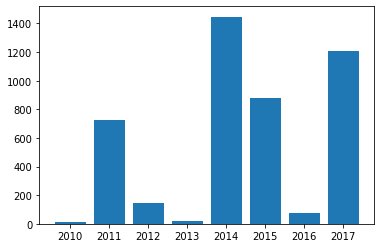

In [7]:
plt.bar(grafico.keys(), grafico.values())
plt.show()